In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
path = "/content/drive/MyDrive/Loan_data.xlsx"
data = pd.read_excel(path, engine="openpyxl")

Mounted at /content/drive


In [ ]:
data

,AnnualIncome,EmploymentStatus,LoanAmount,MonthlyDebtPayments,BankruptcyHistory,TotalAssets,TotalLiabilities,MonthlyIncome,LoanApproved,RiskScore
0,39948,2,13152,183,0,146111,19183,3329,0,49
1,39709,2,26045,496,0,53204,9595,3309,0,52
2,40724,2,17627,902,0,25176,128874,3394,0,52
3,69084,2,37898,755,0,104822,5370,5757,0,54
4,103264,2,9184,274,0,244305,17286,8605,1,36
...,...,...,...,...,...,...,...,...,...,...
1995,38162,2,18921,242,0,39197,80577,3180,0,61
1996,71419,2,37152,300,0,150046,21773,5952,0,45
1997,17664,2,50927,280,0,23197,19998,1472,0,56
1998,22876,2,28262,344,0,502163,70827,1906,0,48


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   AnnualIncome         2000 non-null   int64
 1   EmploymentStatus     2000 non-null   int64
 2   LoanAmount           2000 non-null   int64
 3   MonthlyDebtPayments  2000 non-null   int64
 4   BankruptcyHistory    2000 non-null   int64
 5   TotalAssets          2000 non-null   int64
 6   TotalLiabilities     2000 non-null   int64
 7   MonthlyIncome        2000 non-null   int64
 8   LoanApproved         2000 non-null   int64
 9   RiskScore            2000 non-null   int64
dtypes: int64(10)
memory usage: 156.4 KB


In [ ]:
# Dataset Values(Max, min, std..)
data.describe()

,AnnualIncome,EmploymentStatus,LoanAmount,MonthlyDebtPayments,BankruptcyHistory,TotalAssets,TotalLiabilities,MonthlyIncome,LoanApproved,RiskScore
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03,2000.00000,2000.00000,2000.000000,2000.000000
mean,59428.319500,1.778500,24718.033000,459.414000,0.053500,9.804106e+04,37187.31000,4915.05950,0.238000,50.704000
std,41404.687094,0.562669,13581.128002,240.906323,0.225085,1.322344e+05,46088.96891,3361.90067,0.425966,7.700781
min,15000.000000,0.000000,3729.000000,74.000000,0.000000,2.597000e+03,372.00000,1250.00000,0.000000,29.000000
25%,31032.750000,2.000000,15646.500000,290.000000,0.000000,3.004600e+04,11017.00000,2580.50000,0.000000,46.000000
50%,48705.000000,2.000000,21688.500000,407.500000,0.000000,6.038250e+04,22987.50000,4043.00000,0.000000,52.000000
75%,75739.500000,2.000000,30381.750000,570.250000,0.000000,1.191552e+05,44669.50000,6295.75000,0.000000,56.000000
max,422480.000000,2.000000,158686.000000,1934.000000,1.000000,2.612797e+06,537149.00000,25000.00000,1.000000,79.000000


In [ ]:
# Convert columns to numeric

cols = data.columns
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')

In [ ]:
#data_svm['MonthlyIncome'] = pd.to_numeric(data_svm['MonthlyIncome'], errors='coerce')
#data_svm['RiskScore'] = pd.to_numeric(data_svm['MonthlyIncome'], errors='coerce')


In [ ]:
# Data Correlation: Relationship between columns
data.corr()

,AnnualIncome,EmploymentStatus,LoanAmount,MonthlyDebtPayments,BankruptcyHistory,TotalAssets,TotalLiabilities,MonthlyIncome,LoanApproved,RiskScore
AnnualIncome,1.000000,-0.002743,-0.006712,0.008505,0.062749,-0.011254,0.012682,0.987218,0.604920,-0.479027
EmploymentStatus,-0.002743,1.000000,-0.036280,0.033629,-0.020933,0.016349,-0.016862,-0.003920,0.048911,-0.173769
LoanAmount,-0.006712,-0.036280,1.000000,0.038034,-0.022157,0.012999,-0.025372,-0.008728,-0.229557,0.142706
MonthlyDebtPayments,0.008505,0.033629,0.038034,1.000000,-0.012430,0.006071,-0.021876,0.009529,-0.078925,0.023378
BankruptcyHistory,0.062749,-0.020933,-0.022157,-0.012430,1.000000,-0.007181,-0.012003,0.063864,-0.054607,0.357201
TotalAssets,-0.011254,0.016349,0.012999,0.006071,-0.007181,1.000000,-0.007446,-0.008475,0.190233,-0.286931
TotalLiabilities,0.012682,-0.016862,-0.025372,-0.021876,-0.012003,-0.007446,1.000000,0.012798,-0.007569,0.037227
MonthlyIncome,0.987218,-0.003920,-0.008728,0.009529,0.063864,-0.008475,0.012798,1.000000,0.611919,-0.485938
LoanApproved,0.604920,0.048911,-0.229557,-0.078925,-0.054607,0.190233,-0.007569,0.611919,1.000000,-0.759937
RiskScore,-0.479027,-0.173769,0.142706,0.023378,0.357201,-0.286931,0.037227,-0.485938,-0.759937,1.000000


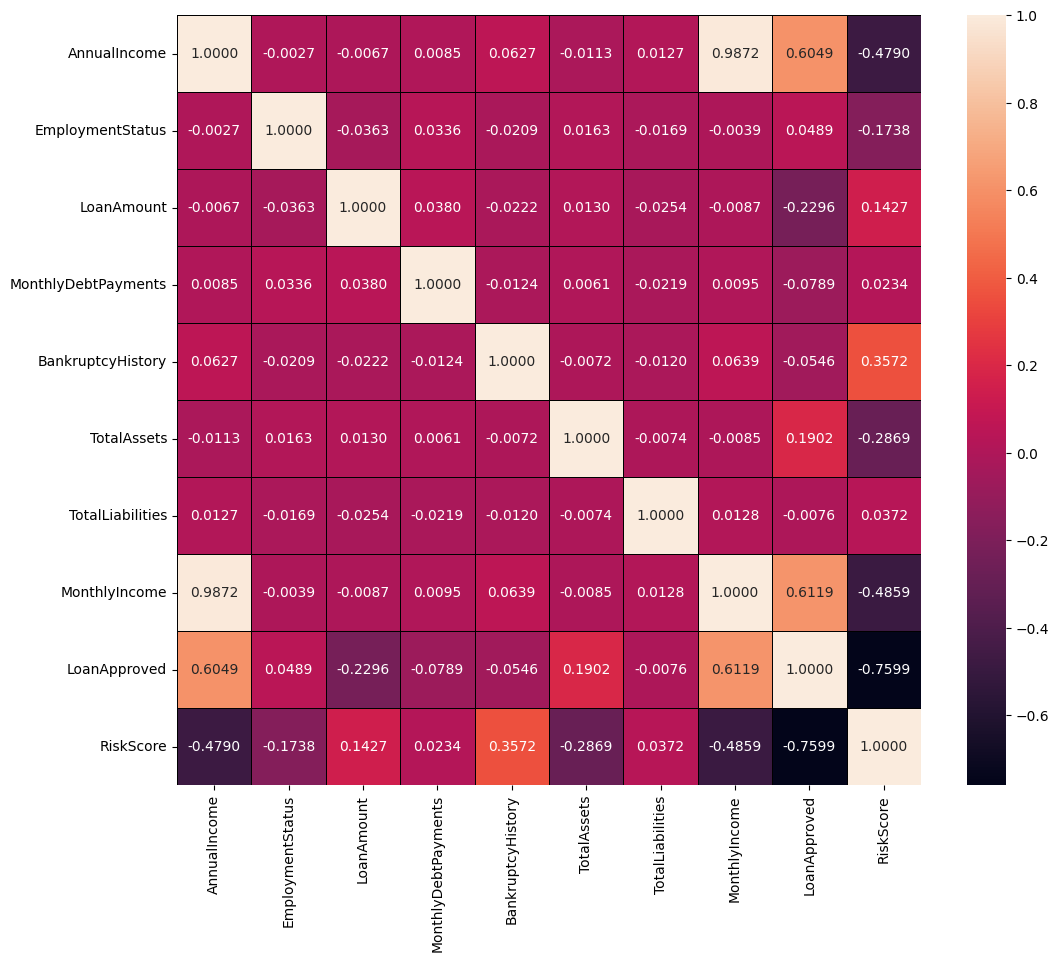

In [ ]:
# Visualization of correlation result with seaborn library heatmap.
f, ax = plt.subplots(figsize = (12,10))
sns.heatmap(data.corr(), annot = True, linewidths=0.5,
            linecolor = "black", fmt = ".4f", ax = ax)
plt.show()

In [ ]:
data_svm = pd.read_excel(path, engine="openpyxl")

In [ ]:
data_svm

,AnnualIncome,EmploymentStatus,LoanAmount,MonthlyDebtPayments,BankruptcyHistory,TotalAssets,TotalLiabilities,MonthlyIncome,LoanApproved,RiskScore
0,39948,2,13152,183,0,146111,19183,3329,0,49
1,39709,2,26045,496,0,53204,9595,3309,0,52
2,40724,2,17627,902,0,25176,128874,3394,0,52
3,69084,2,37898,755,0,104822,5370,5757,0,54
4,103264,2,9184,274,0,244305,17286,8605,1,36
...,...,...,...,...,...,...,...,...,...,...
1995,38162,2,18921,242,0,39197,80577,3180,0,61
1996,71419,2,37152,300,0,150046,21773,5952,0,45
1997,17664,2,50927,280,0,23197,19998,1472,0,56
1998,22876,2,28262,344,0,502163,70827,1906,0,48


,count
LoanApproved,
0,1524
1,476


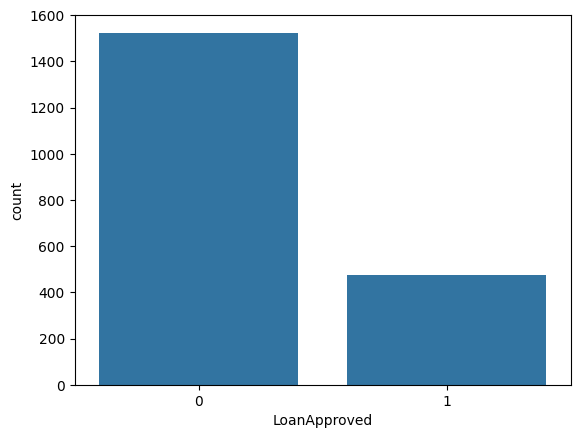

In [ ]:
# First Visual
# The number of Class in the dataset and its graphic.
sns.countplot(x = "LoanApproved", data = data_svm)
data_svm.loc[:,"LoanApproved"].value_counts()

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
path = "/content/drive/MyDrive/Loan_data.xlsx"

data_svm = pd.read_excel(path, engine="openpyxl")

Approved = data_svm[data_svm.LoanApproved == "1"]
Unapproved = data_svm[data_svm.LoanApproved == "0"]

print(Approved.shape)
print(Unapproved.shape)

In [ ]:
# Second Visual
data_svm = pd.read_excel(path, engine="openpyxl")

Approved = data_svm[data_svm.LoanApproved == 1]
Unapproved = data_svm[data_svm.LoanApproved == 0]

plt.figure(figsize = (8,8))
plt.scatter(Approved.AnnualIncome, Approved.TotalAssets, color = "blue",
            label = "Approved", linewidths=0.5)
plt.scatter(Unapproved.AnnualIncome, Unapproved.TotalAssets, color = "red",
            label = "Unapproved", linewidths=0.5)
plt.xlabel("Annual Income")
plt.ylabel("Total Assets")
plt.legend()
plt.show()

# SVM

## SVM for Loan Approval (Classification)

In [ ]:
data_svm = pd.read_excel(path, engine="openpyxl")

# x_data
x_data = data_svm.drop(["LoanApproved", "RiskScore"], axis = 1)

#y_data
y_data = data_svm.LoanApproved.values

In [ ]:
print(x_data.dtypes)

In [ ]:
#Normalization
x_data = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data))

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3,
                                                    random_state = 1)

In [ ]:
from sklearn.svm import SVC

svm = SVC(random_state = 1)
svm.fit(x_train, y_train)

print("print accuracy of svm algo:", svm.score(x_test, y_test))

print accuracy of svm algo: 0.8616666666666667


In [ ]:
test_score_list = []
train_score_list = []

for i in range(1,100):
    svm2 = SVC(C=i)
    svm2.fit(x_train, y_train)
    test_score_list.append(svm2.score(x_test, y_test))
    train_score_list.append(svm2.score(x_train, y_train))

plt.figure(figsize=(15,5))
p = sns.lineplot(x=range(1,100), y=train_score_list,marker='*',label='Train Score')
q = sns.lineplot(x=range(1,100), y=test_score_list,marker='o',label='Test Score')

In [ ]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

grid={"C":[1, 100, 1000],"kernel":["linear","poly","sigmoid"]}

svm3 = SVC(random_state = 1)

svm3.fit(x_train, y_train)

print("test accuracy {}".format(svm3.score(x_test,y_test)))
print("Train accuracy {}".format(svm3.score(x_train, y_train)))

svm3_gscv=GridSearchCV(svm3,grid,cv=10)
svm3_gscv.fit(x_test,y_test)

test accuracy 0.8616666666666667
Train accuracy 0.8871428571428571


GridSearchCV(cv=10, estimator=SVC(random_state=1),
             param_grid={'C': [1, 100, 1000],
                         'kernel': ['linear', 'poly', 'sigmoid']})

In [ ]:
print("best hyperparameters: ", svm3_gscv.best_params_)
print("accuracy: ", svm3_gscv.best_score_)

best hyperparameters:  {'C': 1000, 'kernel': 'linear'}
accuracy:  0.8716666666666667


In [ ]:
from sklearn.svm import SVC
svm4 = SVC(C = 1, kernel="poly")

print("test accuracy: {} ".format(svm4.fit(x_test, y_test).score(x_test, y_test)))
print("train accuracy: {} ".format(svm4.fit(x_train, y_train).score(x_train, y_train)))

test accuracy: 0.86 
train accuracy: 0.8671428571428571 


In [ ]:
# Evaluate on test data
best_model = svm3_gscv.best_params_
y_pred = best_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

best_model = grid_result.best_estimator_
y_pred = best_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.savefig("city_knn_cm1.png", bbox_inches = 'tight', dpi=300)
plt.show()

AttributeError: 'dict' object has no attribute 'predict'

## SVM for Risk Score (Regression)

In [ ]:
data_svm = pd.read_excel(path, engine="openpyxl")

# x_data
x_data = data_svm.drop(["LoanApproved", "RiskScore"], axis = 1)

#y_data
y_data = data_svm.RiskScore.values

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3,
                                                    random_state = 1)
# Split the data
x_train_small, _, y_train_small, _ = train_test_split(x_train, y_train, test_size=0.9, random_state=1)

In [ ]:
from sklearn.svm import SVC

svm = SVC(random_state = 1)
svm.fit(x_train, y_train)

print("print accuracy of svm algo:", svm.score(x_test, y_test))

print accuracy of svm algo: 0.06166666666666667


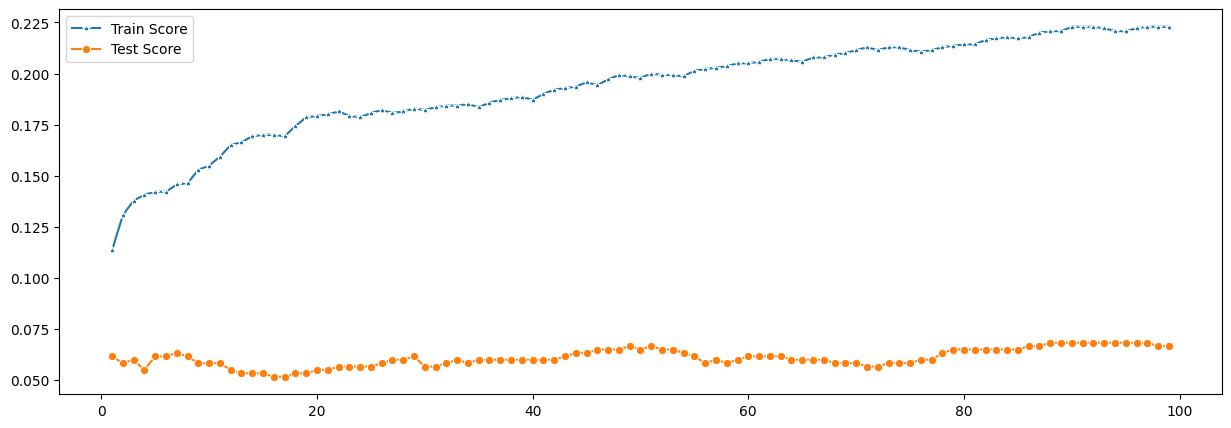

In [ ]:
test_score_list = []
train_score_list = []

for i in range(1,100):
    svm2 = SVC(C=i)
    svm2.fit(x_train, y_train)
    test_score_list.append(svm2.score(x_test, y_test))
    train_score_list.append(svm2.score(x_train, y_train))

plt.figure(figsize=(15,5))
p = sns.lineplot(x=range(1,100), y=train_score_list,marker='*',label='Train Score')
q = sns.lineplot(x=range(1,100), y=test_score_list,marker='o',label='Test Score')

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
grid = {"C": [1, 10], "kernel": ["linear", "poly"]}

# Use StratifiedKFold for cross-validation (to handle imbalanced data)
stratified_kfold = StratifiedKFold(n_splits=3)

# Initialize the SVM model
svm3 = SVC(random_state=1)

# GridSearchCV with stratified k-fold
svm3_gscv = GridSearchCV(svm3, grid, cv=stratified_kfold, n_jobs=-1)

# Fit the model
svm3_gscv.fit(x_train_small, y_train_small)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the grid (using smaller values for faster grid search)
grid = {"C": [1, 10], "kernel": ["linear"]}

# Initialize the SVM
svm3 = SVC(random_state=1)

# Perform GridSearchCV with reduced grid and parallelization
svm3_gscv = GridSearchCV(svm3, grid, cv=3, n_jobs=-1)

# Fit the model
svm3_gscv.fit(x_train_small, y_train_small)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
print("best hyperparameters: ", svm3_gscv.best_params_)
print("accuracy: ", svm3_gscv.best_score_)

In [ ]:
from sklearn.svm import SVC
svm4 = SVC(C = 1, kernel="poly")

print("test accuracy: {} ".format(svm4.fit(x_test, y_test).score(x_test, y_test)))
print("train accuracy: {} ".format(svm4.fit(x_train, y_train).score(x_train, y_train)))

test accuracy: 0.12333333333333334 
train accuracy: 0.11642857142857142 


#KNN

## kNN for Loan Approval (Classification)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

data_svm = pd.read_excel(path, engine="openpyxl")

# x_data
x_data = data_svm.drop(["LoanApproved", "RiskScore"], axis = 1)

#y_data
y_data = data_svm.LoanApproved.values

# Train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3,
                                                    random_state = 1)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

#print(knn.fit(x_train, y_train).score(x_train, y_train))
#print(knn.fit(x_test, y_test).score(x_test, y_test))

print(knn.score(x_train, y_train))
print(knn.score(x_test, y_test))

In [ ]:
y_pred = knn.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.savefig("city_knn_cm1.png", bbox_inches = 'tight', dpi=300)
plt.show()

In [ ]:
# Plot k parameter

test_score_list = []
train_score_list = []

for i in range(3, 101):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(x_train, y_train)
    test_score_list.append(knn2.score(x_test, y_test))
    train_score_list.append(knn2.score(x_train, y_train))
    print(i, end=" ")

plt.figure(figsize=(15,5))
p = sns.lineplot(x=range(3, 101), y=train_score_list, marker="*", label="Train Score")
q = sns.lineplot(x=range(3, 101), y=test_score_list, marker="o", label="Test Score")
plt.savefig("city_knn_ntrend.png", bbox_inches = 'tight', dpi=300)

In [ ]:
# Find the best value for kNN

#import GridSearchCV
from sklearn.model_selection import GridSearchCV

k_range = list(range(3, 51))
grid = dict(n_neighbors=k_range)

knn3 = KNeighborsClassifier()

knn3_gscv=GridSearchCV(knn3,grid,cv=10)
#knn3_gscv.fit(x_test,y_test)
knn3_gscv.fit(x_train,y_train)

In [ ]:
print("best hyperparameters: ", knn3_gscv.best_params_)
print("accuracy: ", knn3_gscv.best_score_)

In [ ]:
knn4 = KNeighborsClassifier(n_neighbors=5)
knn4.fit(x_train, y_train)

print(knn4.score(x_train, y_train))
print(knn4.score(x_test, y_test))

In [ ]:
y_pred4 = knn4.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
conf_matrix4 = confusion_matrix(y_test, y_pred4)
print(classification_report(y_test, y_pred4))

sns.heatmap(conf_matrix4, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.savefig("city_knn_cm2.png", bbox_inches = 'tight', dpi=300)
plt.show()

## kNN for Risk Score (Regression)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

data_svm = pd.read_excel(path, engine="openpyxl")

# x_data
x_data = data_svm.drop(["LoanApproved", "RiskScore"], axis = 1)

#y_data
y_data = data_svm.RiskScore.values

# Train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3,
                                                    random_state = 1)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

#print(knn.fit(x_train, y_train).score(x_train, y_train))
#print(knn.fit(x_test, y_test).score(x_test, y_test))

print(knn.score(x_train, y_train))
print(knn.score(x_test, y_test))

0.38642857142857145
0.056666666666666664


3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

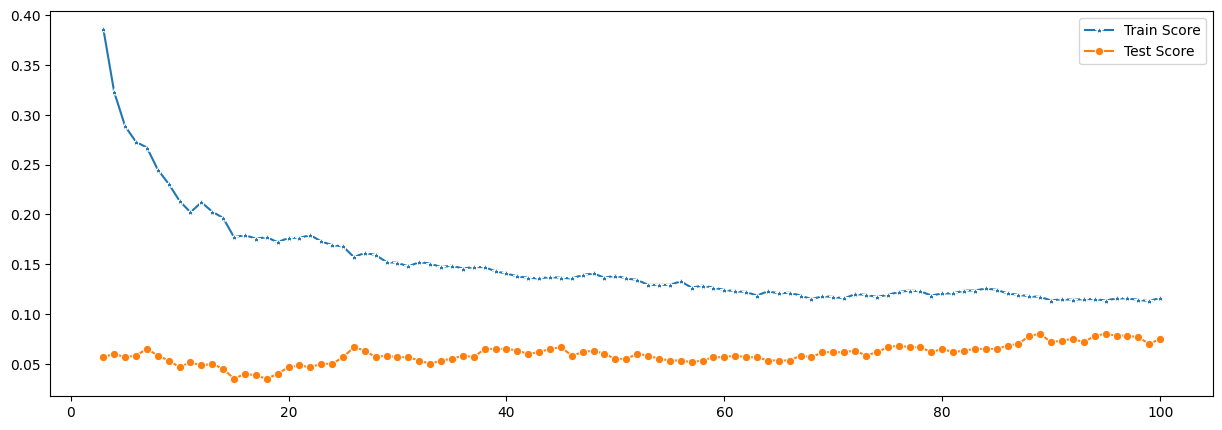

In [ ]:
# Plot k parameter

test_score_list = []
train_score_list = []

for i in range(3, 101):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(x_train, y_train)
    test_score_list.append(knn2.score(x_test, y_test))
    train_score_list.append(knn2.score(x_train, y_train))
    print(i, end=" ")

plt.figure(figsize=(15,5))
p = sns.lineplot(x=range(3, 101), y=train_score_list, marker="*", label="Train Score")
q = sns.lineplot(x=range(3, 101), y=test_score_list, marker="o", label="Test Score")
plt.savefig("city_knn_ntrend.png", bbox_inches = 'tight', dpi=300)

In [ ]:
# Find the best value for kNN

#import GridSearchCV
from sklearn.model_selection import GridSearchCV

k_range = list(range(3, 51))
grid = dict(n_neighbors=k_range)

knn3 = KNeighborsClassifier()

knn3_gscv=GridSearchCV(knn3,grid,cv=10)
#knn3_gscv.fit(x_test,y_test)
knn3_gscv.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30, 31, 32, ...]})

In [ ]:
print("best hyperparameters: ", knn3_gscv.best_params_)
print("accuracy: ", knn3_gscv.best_score_)

best hyperparameters:  {'n_neighbors': 36}
accuracy:  0.07714285714285714


In [ ]:
knn4 = KNeighborsClassifier(n_neighbors=5)
knn4.fit(x_train, y_train)

print(knn4.score(x_train, y_train))
print(knn4.score(x_test, y_test))

0.2885714285714286
0.056666666666666664
